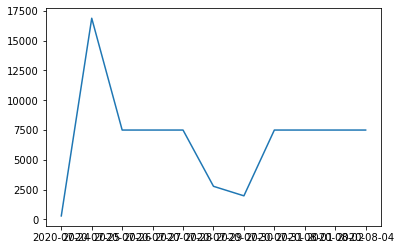

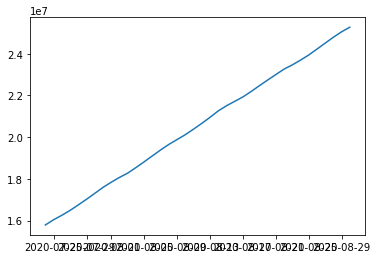

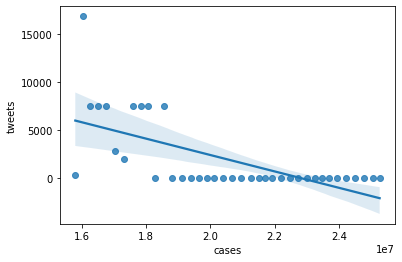

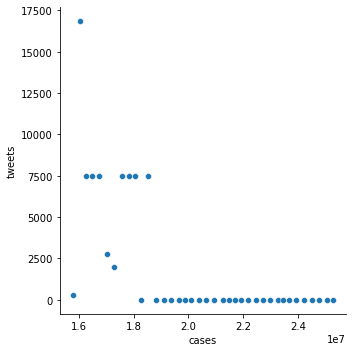

In [1]:
import pandas as pd; pd.set_option("display.max_rows", None, "display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def readData(file):
    data = pd.read_csv(file)
    return data

def tweet_preparation():
    tweets = readData("covid19_tweets.csv")
    tweets[['Date','Hour']] = tweets['date'].str.split(' ',expand=True)
    tweets.set_index('Date')
    tweets.index = pd.to_datetime(tweets.index)
    tweets[['Count']] = 1
    grouped_tweets = tweets.groupby(['Date']).count()

    return grouped_tweets.Count.to_frame(name='tweets')

def cases_preparation():
    df = readData("time_series_covid19_confirmed_global.csv")
    data = df.loc[:,'7/24/20':'8/30/20']

    data = data.T.sum(axis = 1)
    data = data.to_frame(name = 'cases')
    data.index = pd.to_datetime(data.index)
    return data


data_tweets = tweet_preparation()
plt.plot(data_tweets)
plt.show()

data_cases = cases_preparation()
plt.plot(data_cases)
plt.show()


data_cases.index = data_cases.index.strftime('%Y-%m-%d')

df_corr = pd.concat([data_tweets, data_cases], axis=1)
df_corr.fillna(0, inplace=True)
df_corr
sns.regplot(x=df_corr["cases"], y=df_corr["tweets"])
sns.relplot(x=df_corr["cases"], y=df_corr["tweets"])